# **Deep learning Lab Assignment**
**Name:** Ayush Rewatkar    
**Div:** A  
**Batch:** DL-1  
**Roll No:** 12  
**PRN No:** 202201040033  

# **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


# **Load and Preprocess CIFAR-10 Dataset**

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Selecting class "Airplane" (label 0) and merging others into "Not Airplane" (label 1)
y_train_binary = np.where(y_train == 0, 0, 1)
y_test_binary = np.where(y_test == 0, 0, 1)

# Normalize pixel values (Scaling to range 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **Build CNN Model**

In [3]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile the Model**

In [4]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# **Train the Model**

In [5]:
# Train model
history = model.fit(x_train, y_train_binary, epochs=5, validation_data=(x_test, y_test_binary), batch_size=64)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 92ms/step - accuracy: 0.8996 - loss: 0.2733 - val_accuracy: 0.9254 - val_loss: 0.2044
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 84ms/step - accuracy: 0.9254 - loss: 0.1955 - val_accuracy: 0.9322 - val_loss: 0.1746
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.9354 - loss: 0.1704 - val_accuracy: 0.9352 - val_loss: 0.1741
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.9433 - loss: 0.1531 - val_accuracy: 0.9432 - val_loss: 0.1519
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.9506 - loss: 0.1319 - val_accuracy: 0.9449 - val_loss: 0.1449


# **Display Model Summary**

In [6]:
# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,066,949 (4.07 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 711,300 (2.71 MB)

# **Evaluate the Model**

In [7]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_binary, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 4s - 14ms/step - accuracy: 0.9449 - loss: 0.1449
Test Accuracy: 0.9449


# **Plot Training History**

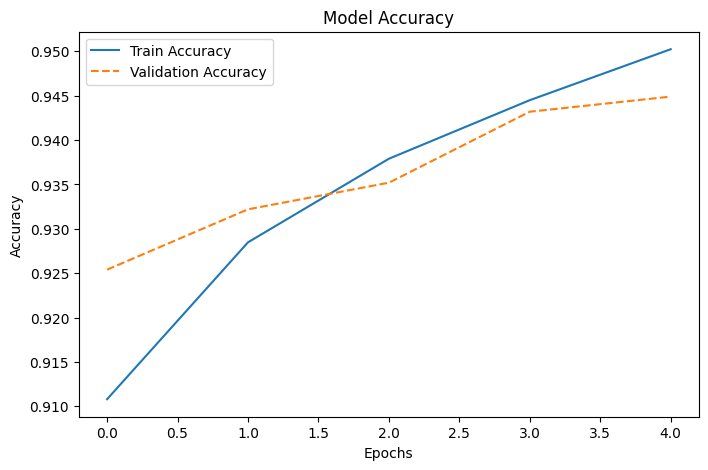

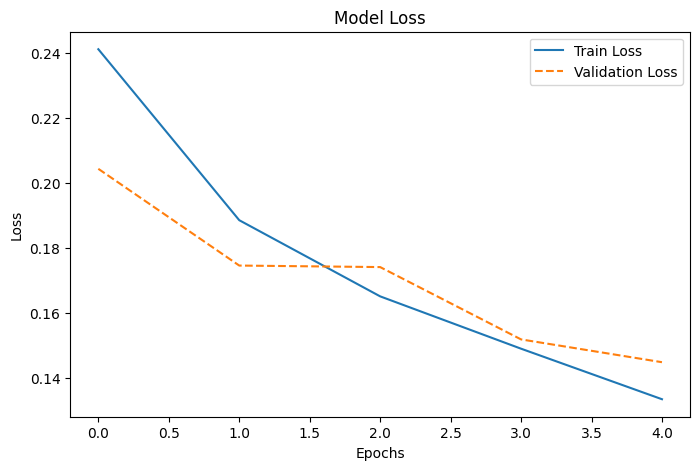

In [8]:
# Plot Accuracy & Loss
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], linestyle="dashed", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], linestyle="dashed", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.show()
